In [13]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt


# Let’s run the basic SIR model

In [14]:
# describe the model
def deriv(y, t, N, beta, k, delta, alfa):
    S, E, I, R, D = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - k * E
    dIdt = k * E - delta * I - alfa * I
    dRdt = delta * I
    dDdt = alfa * I
    return dSdt, dEdt, dIdt, dRdt, dDdt

In [15]:
# describe the parameters
N =  10000000               # population
n = 3                 # days in infectious state
r = 2.94             # reproduction number
beta = r/n            # Rate from infectious state = 0,98
k=1/20                # Exposed to Infected 
delta = 1/10         # Rate from I to R
alfa = 9000/N      # dead per capita
S0, E0, I0, R0, D0 = N-1, 1, 0, 0, 0  # initial conditions: one infected, rest susceptible

In [16]:
t = np.linspace(0,364, 365) # Grid of time points (in days)
y0 = S0, E0, I0, R0, D0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, k, delta, alfa))
S, E, I, R, D = ret.T

In [17]:
def plotsir(t, S, E, I, R, D):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
  ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
  ax.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Deathcases')

  ax.set_xlabel('Time (days)')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.savefig('plot.png')
  plt.show();

def plotsir2(t, E, I, D):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
  ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Deathcases')

  ax.set_xlabel('Time (days)')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.savefig('plot.png')
  plt.show();

plot the graph

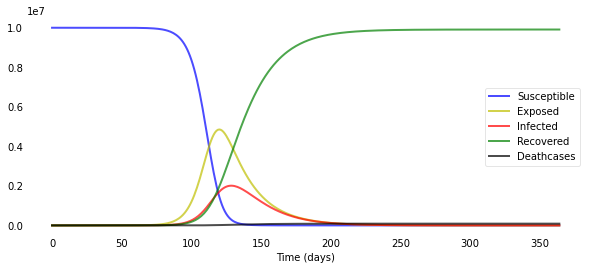

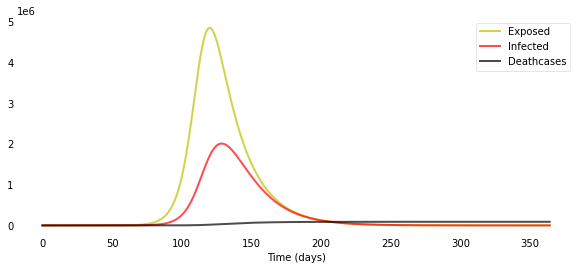

In [18]:

plotsir(t, S, E, I, R, D)
plotsir2(t, E, I, D)